In [1]:
# Imports
import pickle
import torch
import io

from sklearn.metrics.pairwise import cosine_similarity
from sacrebleu.metrics import BLEU
import evaluate

import matplotlib.pyplot as plt

In [2]:
# X -> Z hidden layers
# Y -> Z hidden layrs
# Sentence level cosine similarity between these

# X <-> Y metric scores on sentence level

# Put both of these in some graphs? For an overview how they compare.

In [3]:
# A bit of a stupid workaround but if it works it works
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

#contents = pickle.load(f) becomes...
# contents = CPU_Unpickler(f).load()

In [4]:
path = "/Users/Suzenator/Documents/Uni/M4/MThesis/hidden_states/"
file_jp_fr = "hidden_jp_fr_ALMA-13B-Pretrain-PEFT-MT-gpt-mt-alpha01-high-high.txt"
file_nl_fr = "hidden_nl_fr_ALMA-13B-Pretrain-PEFT-MT-gpt-mt-alpha01-high-high.txt"

# Open the file in binary mode 
with open(path+file_jp_fr, 'rb') as f: 
      
    # Call load method to deserialze 
    jp_fr = CPU_Unpickler(f).load()

# Open the file in binary mode 
with open(path+file_nl_fr, 'rb') as f: 
      
    # Call load method to deserialze 
    nl_fr = CPU_Unpickler(f).load()

In [5]:
cos_similarity = []

assert len(jp_fr) == len(nl_fr)

for i in range(len(jp_fr)):
    cos_similarity.append(cosine_similarity(jp_fr[i], nl_fr[i]))

In [6]:
hyp_path = "/Users/Suzenator/Documents/Uni/M4/MThesis/output/backup/total/high_high/01_gpt-mt/supervised/"
ref_path = "/Users/Suzenator/Documents/Uni/M4/MThesis/Data/flores_subset/devtest_copy/"
ori_path = "/Users/Suzenator/Documents/Uni/M4/MThesis/output/backup/total/high_high/0_gpt-mt/supervised/"

# jp -> nl
jp_nl_hyp_file = "jpn_Jpan.devtest.jpn2nld_translation"
jp_nl_ref_file = "nld_Latn.devtest"

# nl -> jp
nl_jp_hyp_file = "nld_Latn.devtest.nld2jpn_translation"
nl_jp_ref_file = "jpn_Jpan.devtest"

with open(hyp_path+jp_nl_hyp_file) as fp:
    jp_nl_hyp = fp.readlines()
with open(hyp_path+nl_jp_hyp_file) as fp:
    nl_jp_hyp = fp.readlines()

with open(ref_path+jp_nl_ref_file) as fp:
    nl_ref = fp.readlines()
with open(ref_path+nl_jp_ref_file) as fp:
    jp_ref = fp.readlines()

with open(ori_path+jp_nl_hyp_file) as fp:
    jp_nl_ori = fp.readlines()
with open(ori_path+nl_jp_hyp_file) as fp:
    nl_jp_ori = fp.readlines()

# Sanity check
assert len(jp_nl_hyp) == len(nl_ref)
assert len(nl_jp_hyp) == len(jp_ref)
assert len(jp_nl_hyp) == len(nl_jp_hyp)
assert len(nl_ref) == len(jp_ref)

In [7]:
comet = evaluate.load('comet')

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.0.2. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file ../../../../../../.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/371e9839ca4e213dde891b066cf3080f75ec7e72/checkpoints/model.ckpt`
/Users/Suzenator/miniconda3/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Encoder model frozen.
/Users/Suzenator/miniconda3/lib/python3.10/site-packages/pytorch_lightning/core/saving.py:162: UserWarning: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
  rank_zero_warn(


In [8]:
jp_nl_total = comet.compute(predictions=jp_nl_hyp, references=nl_ref, sources=jp_ref)
nl_jp_total = comet.compute(predictions=nl_jp_hyp, references=jp_ref, sources=nl_ref)

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/Suzenator/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/Suzenator/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(


In [9]:
metric_scores_total = [((i+j)/2) for i,j in zip(jp_nl_total['scores'],nl_jp_total['scores'])]
metric_scores_total

[0.7508485913276672,
 0.8569480180740356,
 0.8881703317165375,
 0.8466422855854034,
 0.8258670568466187,
 0.8335850834846497,
 0.8053207397460938,
 0.8330347537994385,
 0.8239040076732635,
 0.8179178833961487,
 0.9096205830574036,
 0.7852592468261719,
 0.8199585378170013,
 0.8423507213592529,
 0.8503656983375549,
 0.8347288370132446,
 0.8696991503238678,
 0.9260623157024384,
 0.883487731218338,
 0.8774834871292114,
 0.9505609571933746,
 0.8935742378234863,
 0.814953625202179,
 0.8311298191547394,
 0.8969602584838867,
 0.9187746942043304,
 0.8077289760112762,
 0.865257978439331,
 0.7944901883602142,
 0.9211248159408569,
 0.7747504115104675,
 0.8308616876602173,
 0.8014885187149048,
 0.8658196926116943,
 0.8091644942760468,
 0.911253809928894,
 0.8868458867073059,
 0.8486946523189545,
 0.859591007232666,
 0.7807002067565918,
 0.837773323059082,
 0.8921196460723877,
 0.8536738753318787,
 0.8577420711517334,
 0.8116194903850555,
 0.8166272044181824,
 0.8544372022151947,
 0.8548281192779541

In [10]:
# Sanity check!
# BLEU scores according to eval:
# gpt-mt alpha=01 HH
# jp -> nl: 13/44.3/83.61
# nl -> jp: 7.2/29.5/85.59

sum(metric_scores_total)/len(metric_scores_total)

0.8459648253182649

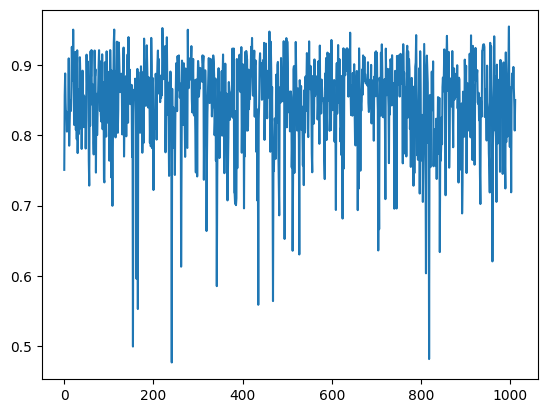

In [11]:
metric_plot = metric_scores_total.copy()
# metric_plot.sort()
plt.plot(metric_plot)

In [12]:
import numpy as np

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

Text(0.5, 1.0, 'Cosine similarity of hidden states of jp-->fr & nl-->fr and the COMET scores of jp<-->nl (XConST)')

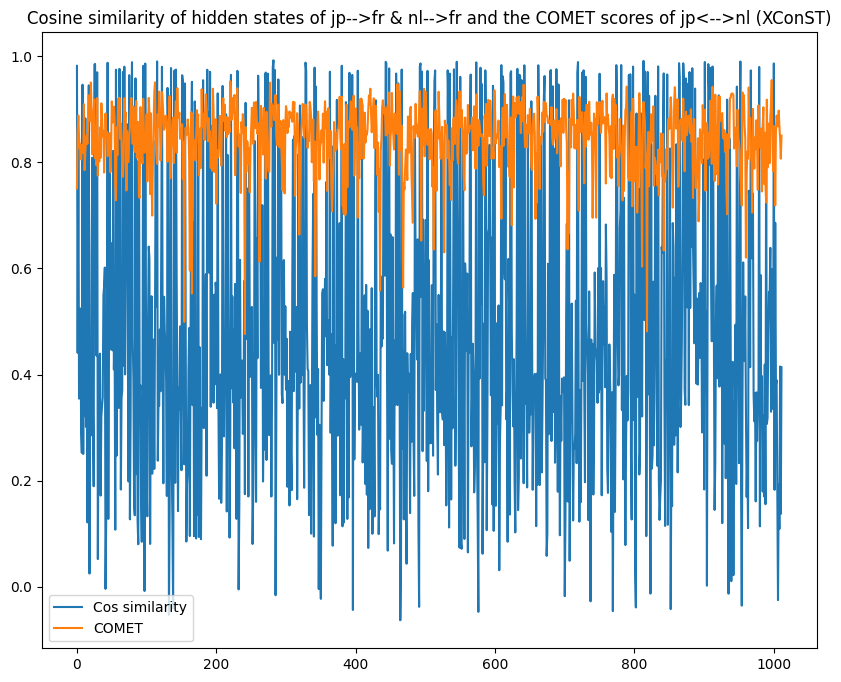

In [13]:

cos_plot = [x[0][0] for x in cos_similarity]
# cos_plot.sort()
plt.figure(figsize=(10,8))
plt.plot(cos_plot, label="Cos similarity")
plt.plot(metric_scores_total, label="COMET")
# plt.plot(jp_nl_total['scores'], label="COMET1")
# plt.plot(nl_jp_total['scores'], label="COMET2")
plt.legend()
plt.title("Cosine similarity of hidden states of jp-->fr & nl-->fr and the COMET scores of jp<-->nl (XConST)")

# plt.scatter(range(len(cos_plot)),NormalizeData(cos_plot), alpha=1)
# plt.scatter(range(len(cos_plot)),NormalizeData(metric_plot), alpha=0.75)

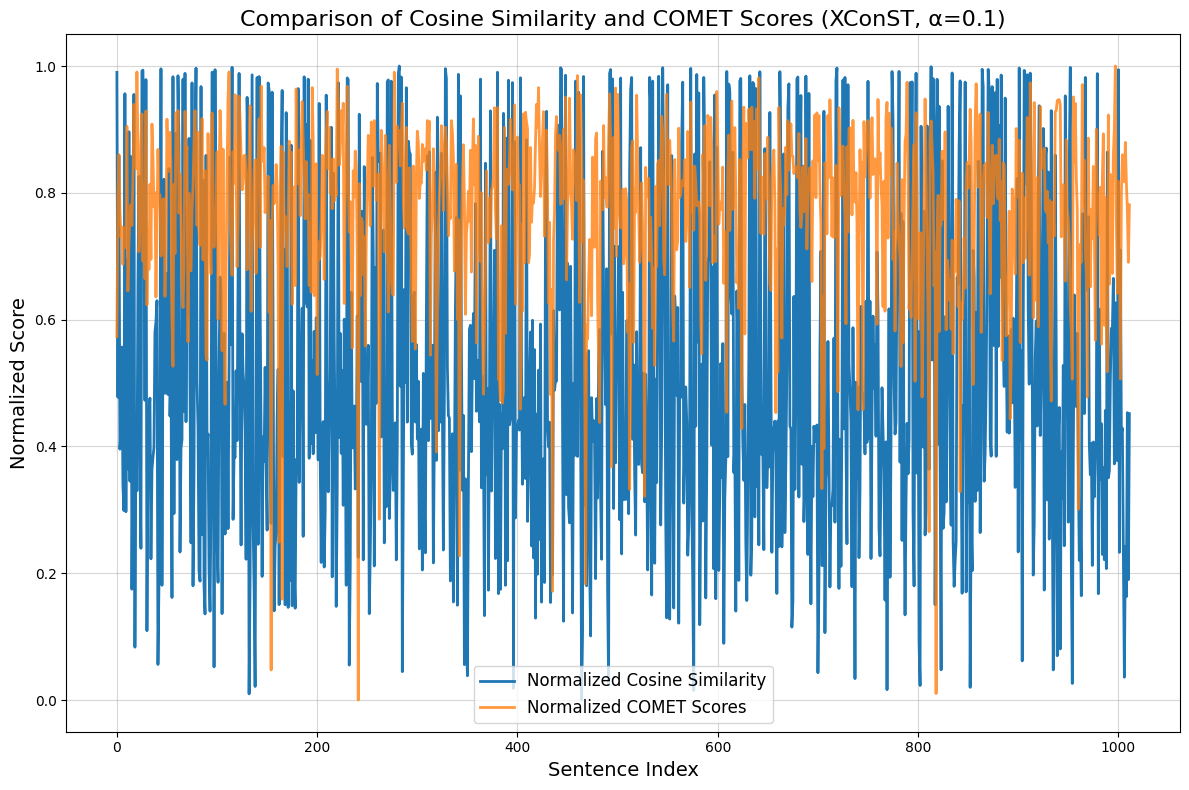

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Normalize data for better comparison in the same scale
def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Extract cosine similarity values
cos_plot = [x[0][0] for x in cos_similarity]
norm_cos_plot = normalize_data(np.array(cos_plot))
norm_metric_scores = normalize_data(np.array(metric_scores_total))

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(norm_cos_plot, label="Normalized Cosine Similarity", linewidth=2)
plt.plot(norm_metric_scores, label="Normalized COMET Scores", linewidth=2, alpha=0.8)

# Enhance visualization
plt.xlabel("Sentence Index", fontsize=14)
plt.ylabel("Normalized Score", fontsize=14)
plt.title("Comparison of Cosine Similarity and COMET Scores (XConST, α=0.1)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()

# Display the plot
plt.show()


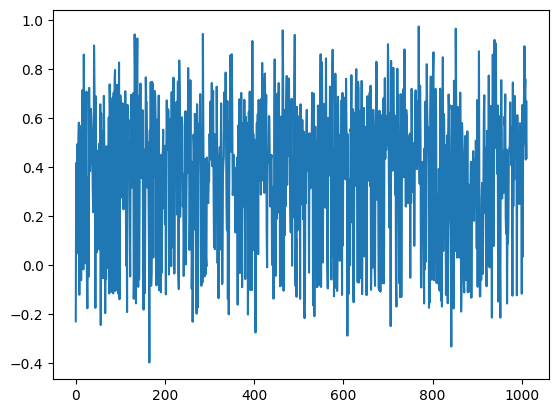

In [14]:
diff = [i-j for i,j in zip(metric_scores_total,[x[0][0] for x in cos_similarity])]
plt.plot(diff)

In [40]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

corr, _ = pearsonr(metric_scores_total, [x[0][0] for x in cos_similarity])
print('Pearsons correlation: %.3f' % corr)

corr, _ = spearmanr(metric_scores_total, [x[0][0] for x in cos_similarity])
print('Spearmanr correlation: %.3f' % corr)

Pearsons correlation: 0.026
Spearmanr correlation: 0.024


In [16]:
bleu = evaluate.load("sacrebleu")
bleu.compute(predictions=jp_nl_hyp, references=nl_ref)

{'score': 13.01530563990693,
 'counts': [11437, 4273, 1970, 969],
 'totals': [24505, 23493, 22481, 21469],
 'precisions': [46.67210773311569,
  18.1883965436513,
  8.76295538454695,
  4.513484559131771],
 'bp': 0.9615032878775575,
 'sys_len': 24505,
 'ref_len': 25467}

In [17]:
bleu.compute(predictions=nl_jp_hyp, references=jp_ref)

{'score': 7.229353126391289,
 'counts': [36, 20, 12, 7],
 'totals': [1195, 183, 125, 81],
 'precisions': [3.01255230125523, 10.92896174863388, 9.6, 8.641975308641975],
 'bp': 1.0,
 'sys_len': 1195,
 'ref_len': 1166}

In [18]:
# There's the 13 and 7.2 :p Seems correct then. Bummer.

In [19]:
print(len([x for x in diff if x > 0.5]))

382


In [20]:
diff_i = [i for i in range(len(diff)) if diff[i] > 0.5]
len(diff_i)

382

In [21]:
hyps = [jp_nl_hyp[i] for i in range(len(jp_nl_hyp)) if i in diff_i]
refs = [nl_ref[i] for i in range(len(nl_ref)) if i in diff_i]
oris = [jp_nl_ori[i] for i in range(len(nl_ref)) if i in diff_i]

for i in range(len(diff_i)):
    print(oris[i])
    print(hyps[i])
    print(refs[i])
    print("---\n")

Hij maakte een bel die klinkt via Wi-Fi.

Hij bouwde een deurbel met Wi-Fi.

Hij zei dat hij daarop een wifi-deurbel maakte.

---

Simonof, die in 2013 een rol speelde in een aflevering van Shark Tank, zegt dat de verkoop explosief is gegroeid nadat de programmacommissie financiële steun weigerde.

Simonov, die in 2013 een aflevering van Shark Tank heeft meegedaan, zegt dat de verkoop explosief is gegroeid nadat de programmacommissie financiële steun heeft afgewezen.

Siminoff zei dat de verkoop steeg nadat hij in 2013 in een aflevering van Shark Tank verscheen, waarbij het panel van het programma de start-up niet wilde financieren.

---

Ring heeft ook een overeenkomst bereikt met ADT, een andere veiligheidsbedrijf.

Ring heeft ook een overeenkomst bereikt met ADT, een andere veiligheidsbedrijf.

Ring trof ook een schikking in een rechtszaak met de ADT Corporation. Dat is een concurrerend beveiligingsbedrijf.

---

De Amerikaanse Gymnastiekbond (USA Gymnastics) ondersteunt de brief va

Tamura-sensei note: 

I understand that there is no correlation.

There seem to be cases where the cosine similarity is almost 1 but comet is low. Could you check a few of the output sentences from those cases and let me know? If there are any non-sensical or repetitive sentences, It's possible that the alignment has improved by mapping sentences that cannot be learned to the hidden vector representing meaningless sentences.

It might also be useful to compare the variance of sentence-wise COMET between with Const and without Const.

In [22]:
jp_nl_total

{'mean_score': 0.8360756860361269,
 'scores': [0.769707441329956,
  0.8348608613014221,
  0.8911464810371399,
  0.8099722266197205,
  0.7518452405929565,
  0.8501226305961609,
  0.7354120016098022,
  0.8056292533874512,
  0.7925916910171509,
  0.8217328786849976,
  0.8919945955276489,
  0.7515136003494263,
  0.8377155661582947,
  0.8489716649055481,
  0.8230687379837036,
  0.8471461534500122,
  0.859346330165863,
  0.9210952520370483,
  0.8847677111625671,
  0.8482276201248169,
  0.9433981776237488,
  0.9230728149414062,
  0.827178955078125,
  0.8296204209327698,
  0.8983339071273804,
  0.9218113422393799,
  0.8228150606155396,
  0.8585809469223022,
  0.8698056936264038,
  0.9053139686584473,
  0.723768949508667,
  0.7878917455673218,
  0.8215879201889038,
  0.832239031791687,
  0.7821423411369324,
  0.8944375514984131,
  0.8853051066398621,
  0.8457373380661011,
  0.8636654615402222,
  0.7008473873138428,
  0.8028571605682373,
  0.8804324865341187,
  0.8669483661651611,
  0.8732007741

In [23]:
# Example output sentences where cos similarity is >0.9 but COMET is <0.6
filter_i_nl = [i for i in range(len(jp_nl_total['scores'])) if cos_similarity[i] > 0.9 and jp_nl_total['scores'][i] < 0.8]
len(filter_i_nl)

filter_i_jp = [i for i in range(len(nl_jp_total['scores'])) if cos_similarity[i] > 0.9 and nl_jp_total['scores'][i] < 0.8]
len(filter_i_jp)

20

In [24]:
hyps = [jp_nl_hyp[i] for i in range(len(jp_nl_hyp)) if i in filter_i_nl]
refs = [nl_ref[i] for i in range(len(nl_ref)) if i in filter_i_nl]
oris = [jp_nl_ori[i] for i in range(len(nl_ref)) if i in filter_i_nl]

for i in range(len(filter_i_nl)):
    # print("Hypothesis (no XConST): {}".format(oris[i]))
    print("Hypothesis: {}".format(hyps[i]))
    print("Reference: {}".format(refs[i]))
    print("---\n")

hyps = [nl_jp_hyp[i] for i in range(len(nl_jp_hyp)) if i in filter_i_jp]
refs = [jp_ref[i] for i in range(len(jp_ref)) if i in filter_i_jp]

for i in range(len(filter_i_jp)):
    print("Hypothesis: {}".format(hyps[i]))
    print("Reference: {}".format(refs[i]))
    print("---\n")

Hypothesis: “Onze 4 maanden oude muizen hadden vroeger diabetes, maar niet meer”, zegt hij.

Reference: 'Inmiddels hebben we muizen van 4 maanden oud die geen diabetes hebben, maar dat eerder wel hebben,' voegde hij er nog aan toe. 

---

Hypothesis: In het najaar van 2017 was Siminoff te zien in een aflevering van QVC.

Reference: Eind 2017 was Siminoff te zien op teleshoppingkanaal QVC.

---

Hypothesis: Kirchner had eerder in 2005 aangekondigd dat ze in 2007 kandidaat zou stellen voor de Senaat van Buenos Aires.

Reference: Mevrouw Kirchner kondigde haar intentie om voor het presidentschap te gaan aan in het Argentijnse Theater, waar ze in 2005 haar campagne voor de senaat startte als lid van de deelstaatafvaardiging van Buenos Aires.

---

Hypothesis: Middenvelder Sachin Tendulkar, Rahul Dravid en VVS Laxman werkten goed samen en scoorden 100 runs.

Reference: In de middelste orde presteerden de slagmannen Sachin Tendulkar en Rahul Dravid goed en maakten samen honderd runs.

---

H

In [25]:
path = "/Users/Suzenator/Documents/Uni/M4/MThesis/hidden_states/"
file_jp_fr_0 = "hidden_jp_fr_ALMA-13B-Pretrain-PEFT-MT-gpt-mt-alpha0-high-high.txt"
file_nl_fr_0 = "hidden_nl_fr_ALMA-13B-Pretrain-PEFT-MT-gpt-mt-alpha0-high-high.txt"

# Open the file in binary mode 
with open(path+file_jp_fr_0, 'rb') as f: 
      
    # Call load method to deserialze 
    jp_fr_0 = CPU_Unpickler(f).load()

# Open the file in binary mode 
with open(path+file_nl_fr_0, 'rb') as f: 
      
    # Call load method to deserialze 
    nl_fr_0 = CPU_Unpickler(f).load()

In [26]:
cos_similarity_0 = []

assert len(jp_fr_0) == len(nl_fr_0)

for i in range(len(jp_fr_0)):
    cos_similarity_0.append(cosine_similarity(jp_fr_0[i], nl_fr_0[i]))

In [27]:
hyp_path_0 = "/Users/Suzenator/Documents/Uni/M4/MThesis/output/backup/total/high_high/0_gpt-mt/supervised/"
ref_path_0 = "/Users/Suzenator/Documents/Uni/M4/MThesis/Data/flores_subset/devtest_copy/"
ori_path_0 = "/Users/Suzenator/Documents/Uni/M4/MThesis/output/backup/total/high_high/0_gpt-mt/supervised/"

# jp -> nl
jp_nl_hyp_file_0 = "jpn_Jpan.devtest.jpn2nld_translation"
jp_nl_ref_file_0 = "nld_Latn.devtest"

# nl -> jp
nl_jp_hyp_file_0 = "nld_Latn.devtest.nld2jpn_translation"
nl_jp_ref_file_0 = "jpn_Jpan.devtest"

with open(hyp_path_0+jp_nl_hyp_file_0) as fp:
    jp_nl_hyp_0 = fp.readlines()
with open(hyp_path_0+nl_jp_hyp_file_0) as fp:
    nl_jp_hyp_0 = fp.readlines()

with open(ref_path_0+jp_nl_ref_file_0) as fp:
    nl_ref_0 = fp.readlines()
with open(ref_path_0+nl_jp_ref_file_0) as fp:
    jp_ref_0 = fp.readlines()

with open(ori_path_0+jp_nl_hyp_file_0) as fp:
    jp_nl_ori_0 = fp.readlines()
with open(ori_path_0+nl_jp_hyp_file_0) as fp:
    nl_jp_ori_0 = fp.readlines()

# Sanity check
assert len(jp_nl_hyp_0) == len(nl_ref_0)
assert len(nl_jp_hyp_0) == len(jp_ref_0)
assert len(jp_nl_hyp_0) == len(nl_jp_hyp_0)
assert len(nl_ref_0) == len(jp_ref_0)

In [28]:
comet = evaluate.load('comet')

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.0.2. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file ../../../../../../.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/371e9839ca4e213dde891b066cf3080f75ec7e72/checkpoints/model.ckpt`
/Users/Suzenator/miniconda3/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Encoder model frozen.
/Users/Suzenator/miniconda3/lib/python3.10/site-packages/pytorch_lightning/core/saving.py:162: UserWarning: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
  rank_zero_warn(


In [29]:
jp_nl_total_0 = comet.compute(predictions=jp_nl_hyp_0, references=nl_ref_0, sources=jp_ref_0)
nl_jp_total_0 = comet.compute(predictions=nl_jp_hyp_0, references=jp_ref_0, sources=nl_ref_0)

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/Suzenator/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/Suzenator/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(


In [30]:
metric_scores_total_0 = [((i+j)/2) for i,j in zip(jp_nl_total_0['scores'],nl_jp_total_0['scores'])]
metric_scores_total_0

[0.7758266925811768,
 0.8410136103630066,
 0.8956537544727325,
 0.847925215959549,
 0.8307724595069885,
 0.8218572437763214,
 0.7987641394138336,
 0.8379288613796234,
 0.8036862313747406,
 0.8427785336971283,
 0.9071410596370697,
 0.8065726161003113,
 0.8297690451145172,
 0.8502041697502136,
 0.8476927578449249,
 0.8163180351257324,
 0.8665465414524078,
 0.9336879253387451,
 0.8823394477367401,
 0.8620784878730774,
 0.9521109163761139,
 0.9455342292785645,
 0.8217462301254272,
 0.8344556987285614,
 0.8969602584838867,
 0.9187746942043304,
 0.8406494855880737,
 0.8324004411697388,
 0.812950998544693,
 0.9213399291038513,
 0.7385867834091187,
 0.8214519321918488,
 0.8040319085121155,
 0.8714599609375,
 0.8426403105258942,
 0.9116470217704773,
 0.8743489682674408,
 0.8395565450191498,
 0.8846096098423004,
 0.8399077653884888,
 0.837773323059082,
 0.8894917070865631,
 0.8573207259178162,
 0.8738113641738892,
 0.8017939925193787,
 0.8265502750873566,
 0.8544372022151947,
 0.8125099539756775

Text(0.5, 1.0, 'Cosine similarity of hidden states of jp->fr & nl->fr and the COMET scores of jp<-->nl (no XConST)')

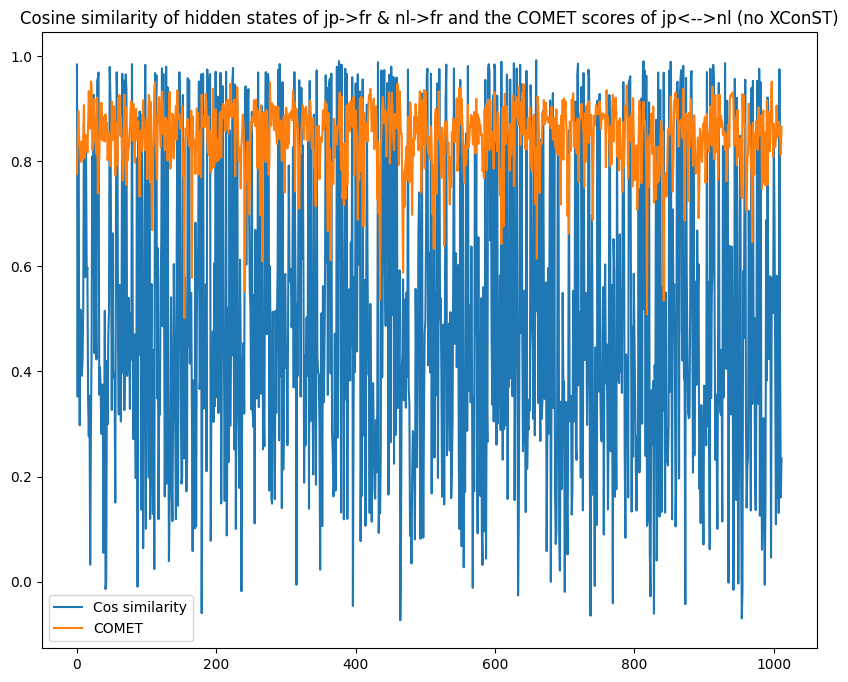

In [35]:

cos_plot_0 = [x[0][0] for x in cos_similarity_0]
# cos_plot.sort()
plt.figure(figsize=(10,8))
plt.plot(cos_plot_0, label="Cos similarity")
plt.plot(metric_scores_total_0, label="COMET")
# plt.plot(jp_nl_total['scores'], label="COMET1")
# plt.plot(nl_jp_total['scores'], label="COMET2")
plt.legend()
plt.title("Cosine similarity of hidden states of jp->fr & nl->fr and the COMET scores of jp<-->nl (no XConST)")

# plt.scatter(range(len(cos_plot)),NormalizeData(cos_plot), alpha=1)
# plt.scatter(range(len(cos_plot)),NormalizeData(metric_plot), alpha=0.75)

In [33]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

corr, _ = pearsonr(metric_scores_total_0, [x[0][0] for x in cos_similarity_0])
print('Pearsons correlation (no XConST): %.3f' % corr)

corr, _ = spearmanr(metric_scores_total_0, [x[0][0] for x in cos_similarity_0])
print('Spearmanr correlation (no XConST): %.3f' % corr)

Pearsons correlation (no XConST): 0.001
Spearmanr correlation (no XConST): 0.007


Text(0.5, 1.0, 'Cosine similarity of hidden states of jp-->fr & nl-->fr and the COMET scores of jp<-->nl (no XConST)')

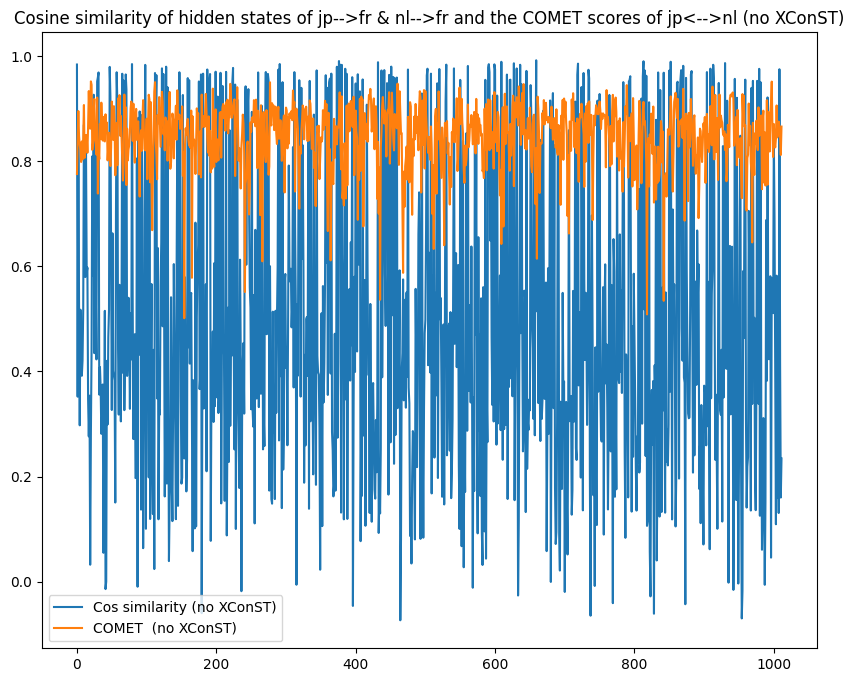

In [34]:

cos_plot_0 = [x[0][0] for x in cos_similarity_0]
# cos_plot.sort()
plt.figure(figsize=(10,8))
# plt.plot(cos_plot, label="Cos similarity")
# plt.plot(metric_scores_total, label="COMET")
plt.plot(cos_plot_0, label="Cos similarity (no XConST)")
plt.plot(metric_scores_total_0, label="COMET  (no XConST)")
# plt.plot(jp_nl_total['scores'], label="COMET1")
# plt.plot(nl_jp_total['scores'], label="COMET2")
plt.legend()
plt.title("Cosine similarity of hidden states of jp-->fr & nl-->fr and the COMET scores of jp<-->nl (no XConST)")

# plt.scatter(range(len(cos_plot)),NormalizeData(cos_plot), alpha=1)
# plt.scatter(range(len(cos_plot)),NormalizeData(metric_plot), alpha=0.75)

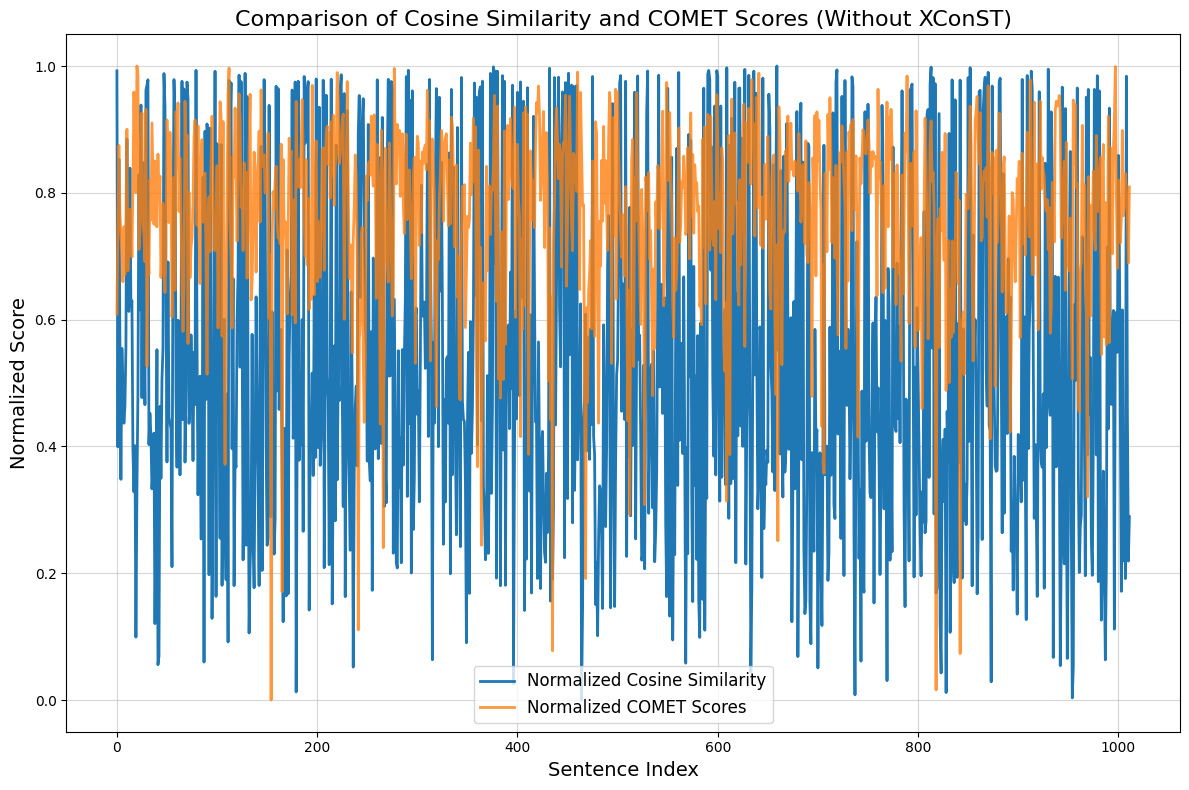

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Normalize data for better comparison in the same scale
def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Extract cosine similarity values
cos_plot = [x[0][0] for x in cos_similarity_0]
norm_cos_plot = normalize_data(np.array(cos_plot))
norm_metric_scores = normalize_data(np.array(metric_scores_total_0))

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(norm_cos_plot, label="Normalized Cosine Similarity", linewidth=2)
plt.plot(norm_metric_scores, label="Normalized COMET Scores", linewidth=2, alpha=0.8)

# Enhance visualization
plt.xlabel("Sentence Index", fontsize=14)
plt.ylabel("Normalized Score", fontsize=14)
plt.title("Comparison of Cosine Similarity and COMET Scores (Without XConST)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()

# Display the plot
plt.show()
